In [1]:
import numpy as np
import pandas as pd

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, accuracy_score, roc_curve
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

%config InlineBackend.figure_format = 'svg'

In [2]:
# Load in models

with open('models.pickle','rb') as read_file:
    models = pickle.load(read_file)

In [3]:
# Load in data

sf1_numbers = pd.read_csv('sf1_numbers_short.csv')
acs1_numbers = pd.read_csv('acs1_numbers_short.csv')
social_numbers = pd.read_csv('social_numbers_short.csv')
economic_numbers = pd.read_csv('economic_numbers_short.csv')
housing_numbers = pd.read_csv('housing_numbers_short.csv')

districts = pd.read_csv('districts.csv')

In [4]:
districts.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
# All models

models

{('sf1_numbers',
  'Random Forest'): RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=15, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 ('acs1_numbers',
  'Random Forest'): RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=18, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 ('social_numbers',
  'Random Forest'): RandomForestClassifier(boot

In [6]:
# Create target variable

targets = pd.read_csv('predictions.csv')

In [7]:
# Create scaler and k-fold for cross validation

scale = StandardScaler()
y = targets['Democrat']

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [8]:
dfs = [sf1_numbers, acs1_numbers, social_numbers, economic_numbers, housing_numbers]

names = ['sf1_numbers','acs1_numbers','social_numbers','economic_numbers','housing_numbers']

for index, df in enumerate(dfs):
    df.drop('Unnamed: 0',axis=1,inplace=True)
    df.name = names[index]

In [9]:
# Scale data where necessary

census = pd.DataFrame()
acs = pd.DataFrame()
social = pd.DataFrame()
economic = pd.DataFrame()
housing = pd.DataFrame()

tables = [census, acs, social, economic, housing]

for table in tables:
    table['Target'] = y

for index, df in enumerate(dfs):
    X = df.values
    for key, model in models.items():
        if key[0] == df.name:
            if key[1] in ['Linear SVM','RBF SVM','Logistic Regression','K Nearest Neighbor']:
                X = scale.fit_transform(X)
            tables[index][key[1]] = model.predict(X)    

In [10]:
# Mean of predicted scores for census data for each model

census.groupby(['Target']).mean()

,Random Forest,Decision Tree,Linear SVM,RBF SVM,Logistic Regression,K Nearest Neighbor
Target,,,,,,
0,0.035560,0.018319,0.185345,0.034483,0.179957,0.008621
1,0.932845,0.921856,0.598291,0.855922,0.609280,0.893773


In [11]:
# Mean of predicted scores for ACS1 data for each model

acs.groupby(['Target']).mean()

,Random Forest,Decision Tree,Linear SVM,RBF SVM,Logistic Regression,K Nearest Neighbor
Target,,,,,,
0,0.025862,0.105603,0.109914,0.037716,0.102371,0.060345
1,0.935287,0.777778,0.769231,0.901099,0.764347,0.855922


In [12]:
# Mean of predicted scores for social demographic data for each model

social.groupby(['Target']).mean()

,Random Forest,Decision Tree,Linear SVM,RBF SVM,Logistic Regression,K Nearest Neighbor
Target,,,,,,
0,0.09375,0.105603,0.174569,0.099138,0.127155,0.109914
1,0.73138,0.722833,0.765568,0.695971,0.719170,0.766789


In [13]:
# Mean of predicted scores for economic data for each model

economic.groupby(['Target']).mean()

,Random Forest,Decision Tree,Linear SVM,RBF SVM,Logistic Regression,K Nearest Neighbor
Target,,,,,,
0,0.031250,0.141164,0.092672,0.038793,0.100216,0.047414
1,0.954823,0.852259,0.798535,0.923077,0.805861,0.791209


In [14]:
# Mean of predicted scores for housing data for each model

housing.groupby(['Target']).mean()

,Random Forest,Decision Tree,Linear SVM,RBF SVM,Logistic Regression,K Nearest Neighbor
Target,,,,,,
0,0.162716,0.258621,0.232759,0.181034,0.296336,0.158405
1,0.807082,0.824176,0.772894,0.749695,0.814408,0.700855


In [83]:
# Classification report for K-Nearest Neighbor model against census data

classification_report(y, census_knn.predict(census_df), output_dict=True)

{'0': {'precision': 0.55092316855271,
  'recall': 0.9967672413793104,
  'f1-score': 0.7096279248177982,
  'support': 928},
 '1': {'precision': 0.9558823529411765,
  'recall': 0.07936507936507936,
  'f1-score': 0.14656144306651633,
  'support': 819},
 'micro avg': {'precision': 0.5666857469948483,
  'recall': 0.5666857469948483,
  'f1-score': 0.5666857469948483,
  'support': 1747},
 'macro avg': {'precision': 0.7534027607469432,
  'recall': 0.5380661603721949,
  'f1-score': 0.4280946839421573,
  'support': 1747},
 'weighted avg': {'precision': 0.7407695177308177,
  'recall': 0.5666857469948483,
  'f1-score': 0.4456602954220914,
  'support': 1747}}

In [15]:
# Create logical variables for each model

census_rf = models[('sf1_numbers', 'Random Forest')]
census_dt = models[('sf1_numbers','Decision Tree')]
census_lvm = models[('sf1_numbers','Linear SVM')]
census_svm = models[('sf1_numbers','RBF SVM')]
census_lr = models[('sf1_numbers','Logistic Regression')]
census_knn = models[('sf1_numbers','K Nearest Neighbor')]

census_models = [census_rf, census_dt, census_lvm, census_svm, census_lr, census_knn]

acs_rf = models[('acs1_numbers', 'Random Forest')]
acs_dt = models[('acs1_numbers', 'Decision Tree')]
acs_lvm = models[('acs1_numbers', 'Linear SVM')]
acs_svm = models[('acs1_numbers','RBF SVM')]
acs_lr = models[('acs1_numbers','Logistic Regression')]
acs_knn = models[('acs1_numbers','K Nearest Neighbor')]

acs_models = [acs_rf, acs_dt, acs_lvm, acs_svm, acs_lr, acs_knn]

social_rf = models[('social_numbers', 'Random Forest')]
social_dt = models[('social_numbers', 'Decision Tree')]
social_lvm = models[('social_numbers', 'Linear SVM')]
social_svm = models[('social_numbers','RBF SVM')]
social_lr = models[('social_numbers','Logistic Regression')]
social_knn = models[('social_numbers','K Nearest Neighbor')]

social_models = [social_rf, social_dt, social_lvm, social_svm, social_lr, social_knn]

economic_rf = models[('economic_numbers', 'Random Forest')]
economic_dt = models[('economic_numbers', 'Logistic Regression')]
economic_lvm = models[('economic_numbers', 'Linear SVM')]
economic_svm = models[('economic_numbers','RBF SVM')]
economic_lr = models[('economic_numbers', 'Logistic Regression')]
economic_knn = models[('economic_numbers','K Nearest Neighbor')]

economic_models = [economic_rf, economic_dt, economic_lvm, economic_svm, economic_lr, economic_knn]

housing_rf = models[('housing_numbers', 'Random Forest')]
housing_dt = models[('housing_numbers', 'Decision Tree')]
housing_lvm = models[('housing_numbers', 'Linear SVM')]
housing_svm = models[('housing_numbers','RBF SVM')]
housing_lr = models[('housing_numbers', 'Logistic Regression')]
housing_knn = models[('housing_numbers','K Nearest Neighbor')]

housing_models = [housing_rf, housing_dt, housing_lvm, housing_svm, housing_lr, housing_knn]

In [18]:
# Print AUC scores for each model for census data

for model in census_models:
    print(roc_auc_score(y, model.predict(census_df)))

0.9486422940086734
0.9517684781693402
0.7054742431897606
0.5
0.699809350132626
0.5380661603721949


In [19]:
# Print AUC scores for each model for ACS1 data

for model in acs_models:
    print(roc_auc_score(y, model.predict(acs_df)))

0.954712433160709
0.8360871647509578
0.5
0.5
0.5
0.5080101890446718


In [20]:
# Print AUC score for each model for social demographic data

for model in social_models:
    print(roc_auc_score(y, model.predict(social_df)))

0.8188148656898657
0.8086146372784304
0.5
0.5
0.5
0.5


In [21]:
# Print AUC score for each model for economic data

for model in economic_models:
    print(roc_auc_score(y, model.predict(economic_df)))

0.9617864774114774
0.7954783482800724
0.7886194265504611
0.5
0.7954783482800724
0.5540825912593155


In [22]:
# Print AUC score for each model for housing data

for model in housing_models:
    print(roc_auc_score(y, model.predict(housing_df))) 

0.8221831449202138
0.7827775672603259
0.5012210012210012
0.5
0.5
0.7318422119068672


In [23]:
# Create list of census voting models

census_voting_models = []
for key, model in models.items():
    if key[0] == 'sf1_numbers':
        census_voting_models.append((key[1],model))

In [24]:
# Only keep KNN and RF models

del census_voting_models[1:5]

In [25]:
# Create voting classifier for census data

census_voter = VotingClassifier(estimators=census_voting_models, voting='soft',n_jobs=-1)

In [26]:
# Create list of voting models for ACS data

acs_voting_models = []
for key, model in models.items():
    if key[0] == 'acs1_numbers':
        acs_voting_models.append((key[1],model))

In [27]:
# Only keep KNN and RF

del acs_voting_models[1:5]

In [28]:
# Create voting classifier for ACS data

acs_voter = VotingClassifier(estimators=acs_voting_models, voting='soft',n_jobs=-1)

In [29]:
# List of voting models for social demographic data

social_voting_models = []
for key, model in models.items():
    if key[0] == 'social_numbers':
        social_voting_models.append((key[1],model))


In [30]:
# Only keep RF and KNN models

del social_voting_models[1:5]

In [31]:
# Create voting classifier for social demographic data

social_voter = VotingClassifier(estimators=social_voting_models, voting='soft',n_jobs=-1)

In [32]:
# Create list of economic data voting classifier models

economic_voting_models = []
for key, model in models.items():
    if key[0] == 'economic_numbers':
        economic_voting_models.append((key[1],model))

In [33]:
# Only keep RF and KNN models

del economic_voting_models[1:5]

In [34]:
# Create economic voting classifier model

economic_voter = VotingClassifier(estimators=economic_voting_models, voting='soft',n_jobs=-1)

In [35]:
# Create list of voting models for housing data

housing_voting_models = []
for key, model in models.items():
    if key[0] == 'housing_numbers':
        housing_voting_models.append((key[1],model))

In [36]:
# Only keep RF and KNN models

del housing_voting_models[1:5]

In [37]:
# Create voting classifier for housing data

housing_voter = VotingClassifier(estimators=housing_voting_models, voting='soft',n_jobs=-1)

In [38]:
# List of voting classifiers for each data set

voting_models = [census_voter,acs_voter,social_voter,economic_voter,housing_voter]

In [39]:
census_df = sf1_numbers
acs_df = acs1_numbers
social_df = social_numbers
economic_df = economic_numbers
housing_df = housing_numbers

dfs = [census_df, acs_df, social_df, economic_df, housing_df]

names = ['Census','ACS','Social','Economic','Housing']

for index, df in enumerate(dfs):
    df.name = names[index]

In [40]:
# Get AUC score for each voting model for each data frame

for index, df in enumerate(dfs):  
    X = df.values
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    voting_models[index].fit(X_train,y_train)
    print(roc_auc_score(y_test, voting_models[index].predict(X_test)))

0.9222222222222222
0.8607843137254901
0.7741830065359476
0.8702614379084967
0.7741830065359477


In [41]:
# Create voting and probability tables for each voting classifier for each data frame

voting = pd.DataFrame()
probabilities = pd.DataFrame()

voting['Target'] = targets['Democrat']
probabilities['Target'] = targets['Democrat']

for index, df in enumerate(dfs):
    probs = pd.DataFrame(voting_models[index].predict_proba(df))
    voting[df.name] = voting_models[index].predict(df)
    probabilities[df.name] = probs[1]

In [42]:
probabilities

,Target,Census,ACS,Social,Economic,Housing
0,0,0.000000,0.00,0.245310,0.0625,0.204202
1,0,0.000000,0.00,0.245310,0.0625,0.204202
2,0,0.000000,0.10,0.063551,0.0625,0.163334
3,0,0.000000,0.10,0.109117,0.0000,0.193509
4,0,0.000000,0.00,0.059448,0.0000,0.117908
5,0,0.000000,0.00,0.433285,0.0000,0.032921
6,0,0.050000,0.00,0.062364,0.0000,0.086787
7,1,1.000000,0.95,0.958578,0.8250,0.598757
8,0,0.002381,0.25,0.346091,0.2125,0.562621
9,1,0.902381,0.90,0.698793,0.8250,0.850543


In [43]:
voting

,Target,Census,ACS,Social,Economic,Housing
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,1,1,1,1,1,1
8,0,0,0,0,0,1
9,1,1,1,1,1,1


In [44]:
# Mean of predicted scores for voting table for each data set

voting.groupby(['Target']).mean()

,Census,ACS,Social,Economic,Housing
Target,,,,,
0,0.025862,0.021552,0.102371,0.028017,0.173491
1,0.923077,0.932845,0.754579,0.936508,0.805861


In [45]:
# Mean of predicted probabilities for probability table for each data set

probabilities.groupby(['Target']).mean()

,Census,ACS,Social,Economic,Housing
Target,,,,,
0,0.068667,0.109988,0.232014,0.111457,0.266818
1,0.922931,0.863210,0.724741,0.836798,0.696286


In [46]:
# Classification report for economic data

classification_report(voting['Target'],voting['Economic'], output_dict=True)

{'0': {'precision': 0.9454926624737946,
  'recall': 0.9719827586206896,
  'f1-score': 0.9585547290116897,
  'support': 928},
 '1': {'precision': 0.9672131147540983,
  'recall': 0.9365079365079365,
  'f1-score': 0.9516129032258064,
  'support': 819},
 'micro avg': {'precision': 0.9553520320549513,
  'recall': 0.9553520320549513,
  'f1-score': 0.9553520320549513,
  'support': 1747},
 'macro avg': {'precision': 0.9563528886139465,
  'recall': 0.9542453475643131,
  'f1-score': 0.955083816118748,
  'support': 1747},
 'weighted avg': {'precision': 0.9556752900740056,
  'recall': 0.9553520320549513,
  'f1-score': 0.9553003756524233,
  'support': 1747}}

In [47]:
# Split voting classifiers for ACS data combined and split apart and create final voting classifier

split_voters = [('census',census_voter),('social',social_voter),('economic',economic_voter),('housing',housing_voter)]
combined_voters = [('census',census_voter),('acs',acs_voter)]

voter = VotingClassifier(estimators=split_voters,voting='soft',n_jobs=-1)

In [48]:
# Fit final voting classifier against whole data set

X = probabilities.loc[:,['Census','Social','Economic','Housing']]
y = probabilities.loc[:,'Target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

voter.fit(X_train, y_train)

VotingClassifier(estimators=[('census', VotingClassifier(estimators=[('Random Forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_sample...    weights='uniform'))],
         flatten_transform=None, n_jobs=-1, voting='soft', weights=None))],
         flatten_transform=None, n_jobs=-1, voting='soft', weights=None)

In [49]:
# Cross validation score for final voting classifier

np.mean(cross_val_score(voter, X_train, y_train, scoring='roc_auc',cv=kf))

0.9986672437598301

In [50]:
# AUC score for final voting classifier

roc_auc_score(y_test,voter.predict(X_test))

0.8998366013071896

In [51]:
# Create probability and voting tables for final voting classifier

probability = pd.DataFrame()
vote = pd.DataFrame()

vote['Target'] = targets['Democrat']
vote['Vote'] = voter.predict(X)

probs = pd.DataFrame(voter.predict_proba(X))
probability['Party'] = targets['Party']
probability['Republican'] = probs[0]
probability['Democrat'] = probs[1]

In [52]:
probs = pd.DataFrame(voter.predict_proba(X))

fpr, tpr, thresh = roc_curve(vote['Target'], probs[1])

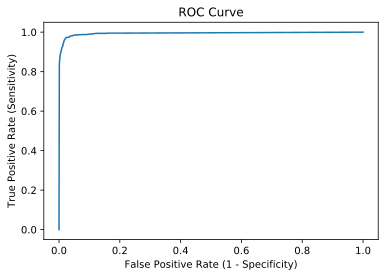

In [53]:
# Plot ROC curve for final voting classifier

plt.figure(dpi=150)
sns.lineplot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)');
plt.savefig('roccurve.png', format='png')

In [55]:
# Classification report for final voting classifier

classification_report(vote['Target'],vote['Vote'], output_dict=True)

{'0': {'precision': 0.9762931034482759,
  'recall': 0.9762931034482759,
  'f1-score': 0.9762931034482759,
  'support': 928},
 '1': {'precision': 0.9731379731379731,
  'recall': 0.9731379731379731,
  'f1-score': 0.9731379731379731,
  'support': 819},
 'micro avg': {'precision': 0.9748139668002289,
  'recall': 0.9748139668002289,
  'f1-score': 0.9748139668002289,
  'support': 1747},
 'macro avg': {'precision': 0.9747155382931245,
  'recall': 0.9747155382931245,
  'f1-score': 0.9747155382931245,
  'support': 1747},
 'weighted avg': {'precision': 0.9748139668002289,
  'recall': 0.9748139668002289,
  'f1-score': 0.9748139668002289,
  'support': 1747}}

In [56]:
# Accuracy score for final voting classifier

accuracy_score(vote['Target'],vote['Vote'])

0.9748139668002289

In [57]:
# Mean of predicted probability for each party for final voting classifier

probability.groupby('Party').mean()

,Republican,Democrat
Party,,
Democratic,0.042412,0.957588
Republican,0.965737,0.034263


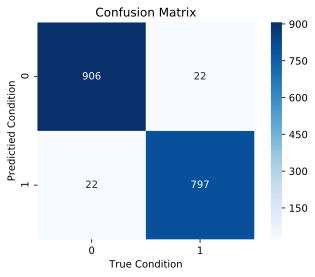

In [58]:
# Confusion matrix for final voting classifier

plt.figure(dpi=150)
sns.heatmap(confusion_matrix(vote['Target'],voter.predict(X)), cmap=plt.cm.Blues, annot=True, square=True, fmt='g');
plt.title('Confusion Matrix')
plt.xlabel('True Condition')
plt.ylabel('Predictied Condition');
plt.savefig('confusion.png', format='png')

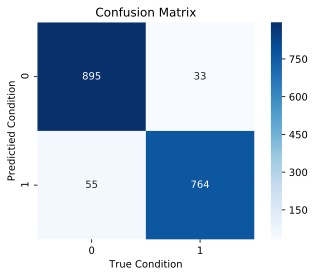

In [82]:
# Confusion matrix for just census random forest model for comparison purposes

plt.figure(dpi=150)
sns.heatmap(confusion_matrix(y,census_rf.predict(census_df)), cmap=plt.cm.Blues, annot=True, square=True, fmt='g');
plt.title('Confusion Matrix')
plt.xlabel('True Condition')
plt.ylabel('Predictied Condition');

In [60]:
# AUC Score for just census random forest model for comparison purposes

roc_auc_score(y, census_rf.predict(census_df))

0.9486422940086734

In [62]:
# Classification report for just census random forest model for comparison purposes

classification_report(y, census_rf.predict(census_df), output_dict=True)

{'0': {'precision': 0.9421052631578948,
  'recall': 0.9644396551724138,
  'f1-score': 0.9531416400425986,
  'support': 928},
 '1': {'precision': 0.958594730238394,
  'recall': 0.9328449328449329,
  'f1-score': 0.9455445544554455,
  'support': 819},
 'micro avg': {'precision': 0.9496279336004579,
  'recall': 0.9496279336004579,
  'f1-score': 0.9496279336004579,
  'support': 1747},
 'macro avg': {'precision': 0.9503499966981444,
  'recall': 0.9486422940086734,
  'f1-score': 0.949343097249022,
  'support': 1747},
 'weighted avg': {'precision': 0.949835585733126,
  'recall': 0.9496279336004579,
  'f1-score': 0.9495800984880031,
  'support': 1747}}

In [63]:
# Cross validation score for just census random forest model for comparison purposes

X_train, X_test, y_train, y_test = train_test_split(census_df,y,test_size=0.2,random_state=42)

np.mean(cross_val_score(census_rf,X_train,y_train,cv=kf,scoring='roc_auc'))

0.9560765805028956

This is all creating a table for loading final probabilities, predictions, and values into Tableau

In [66]:
key = pd.read_csv('key.csv')

In [70]:
key['Party'] = probability['Party']
key['Probability Republican'] = probability['Republican']
key['Probability Democratic'] = probability['Democrat']
key['Census Vote'] = voting['Census']
key['ACS Vote'] = voting['ACS']
key['Social Vote'] = voting['Social']
key['Economic Vote'] = voting['Economic']
key['Housing Vote'] = voting['Housing']
key['Census Probability'] = probabilities['Census']
key['ACS Probability'] = probabilities['ACS']
key['Social Probability'] = probabilities['Social']
key['Economic Probability'] = probabilities['Economic']
key['Housing Probability'] = probabilities['Housing']

In [71]:
key.drop('URL',axis=1,inplace=True)

In [72]:
key[['Democratic','Republican']] = pd.get_dummies(key['Party'])

In [ ]:
key.drop([8,128,129,439,558,559,560,874,996,997,1320,1441,1442], axis=0, inplace=True)

In [ ]:
key.reset_index(inplace=True)
key.drop(['index'],axis=1,inplace=True)

In [ ]:
key.to_csv('voting.csv')